<a href="https://colab.research.google.com/github/AnisZakari/Bar_Chart_Race_Premiere_League/blob/main/bar_chart_race_g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install bar_chart_race
!apt install ffmpeg
import bar_chart_race as bcr
import requests
from io import BytesIO
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

     |████████████████████████████████| 163kB 12.2MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
dataset = pd.read_csv('http://www.football-data.co.uk/mmz4281/1920/E0.csv')
dataset = dataset.iloc[:,:24]

In [ ]:
dataset.head()

Div        Date   Time        HomeTeam          AwayTeam  ...  AC  HY AY  HR  AR
0  E0  09/08/2019  20:00       Liverpool           Norwich  ...   2   0  2   0   0
1  E0  10/08/2019  12:30        West Ham          Man City  ...   1   2  2   0   0
2  E0  10/08/2019  15:00     Bournemouth  Sheffield United  ...   4   2  1   0   0
3  E0  10/08/2019  15:00         Burnley       Southampton  ...   7   0  0   0   0
4  E0  10/08/2019  15:00  Crystal Palace           Everton  ...   2   2  1   0   1

[5 rows x 24 columns]

# Preprocessing for bar_chart_race

In [ ]:
#get list of all teams
teams = dataset['HomeTeam'].unique()
#get list of dates
dates = dataset['Date'].unique()

In [ ]:
#making a table in which each column displays points for a team
points_table = pd.DataFrame( np.zeros( (len(dates), len(teams)) ), columns = teams, index = dates )

In [ ]:
#FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
for i, result in enumerate(dataset['FTR']):
  if result =="A":
    date = dataset.loc[i, 'Date']
    awayteam = dataset.loc[i, 'AwayTeam']
    hometeam = dataset.loc[i, 'HomeTeam']

    points_table.loc[date, awayteam] = 3
    points_table.loc[date, hometeam] = 0

  if result =="H":
    date = dataset.loc[i, 'Date']
    awayteam = dataset.loc[i, 'AwayTeam']
    hometeam = dataset.loc[i, 'HomeTeam']

    points_table.loc[date, awayteam] = 0
    points_table.loc[date, hometeam] = 3

  if result =="D":
    date = dataset.loc[i, 'Date']
    awayteam = dataset.loc[i, 'AwayTeam']
    hometeam = dataset.loc[i, 'HomeTeam']

    points_table.loc[date, awayteam] = 1
    points_table.loc[date, hometeam] = 1

## Points table

In [ ]:
points_table.reset_index(level=0, inplace=True)
points_table.rename(columns={'index': 'date'}, inplace = True)
points_table.head()

date  Liverpool  West Ham  ...  Sheffield United  Chelsea  Wolves
0  09/08/2019        3.0       0.0  ...               0.0      0.0     0.0
1  10/08/2019        0.0       0.0  ...               1.0      0.0     0.0
2  11/08/2019        0.0       0.0  ...               0.0      0.0     1.0
3  17/08/2019        3.0       1.0  ...               0.0      0.0     0.0
4  18/08/2019        0.0       0.0  ...               3.0      1.0     0.0

[5 rows x 21 columns]

## Cumulative points

In [ ]:
for team in teams:
  for i in range(1,len(points_table)):
    points_table.loc[i, team] += points_table.loc[i-1, team]

In [ ]:
points_table.set_index('date', inplace=True)
points_table.head()

Liverpool  West Ham  Bournemouth  ...  Sheffield United  Chelsea  Wolves
date                                          ...                                   
09/08/2019        3.0       0.0          0.0  ...               0.0      0.0     0.0
10/08/2019        3.0       0.0          1.0  ...               1.0      0.0     0.0
11/08/2019        3.0       0.0          1.0  ...               1.0      0.0     1.0
17/08/2019        6.0       1.0          4.0  ...               1.0      0.0     1.0
18/08/2019        6.0       1.0          4.0  ...               4.0      1.0     1.0

[5 rows x 20 columns]

In [ ]:
bcr.bar_chart_race(df = points_table,
                   title = 'Premiere League Road to title Season 19/20',
                   bar_size= 1   )

# Using Matplotlib

In [ ]:
import os
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt


fpath = "font_/twcen.TTF"
prop_title = fm.FontProperties(fname=fpath, size = 16, weight = 600)
prop_light = fm.FontProperties(fname=fpath, size = 6)
fname = os.path.split(fpath)[1]

def nice_axes(ax):


    ax.text(0.5, 1.12, 'Premiere League season 19/20',
            transform=ax.transAxes, size=50, weight=600, ha='center', FontProperties =prop_title)
    
    #ax.set_facecolor('.8')
    ax.tick_params(labelsize=7, length=0)
    ax.text(0.96, 0.05, 'by @AnisZakari', transform=ax.transAxes, ha='right', size = 5,
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    
    ax.text(0, 1.06, 'Match Points', transform=ax.transAxes, size=5, color='#777777')

    ax.margins(0, 0.01)

    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=5)

    ax.grid(which='major', axis='x', linestyle='-', linewidth=0.2)
    #ax.grid(True, axis='x', color='white')

    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)

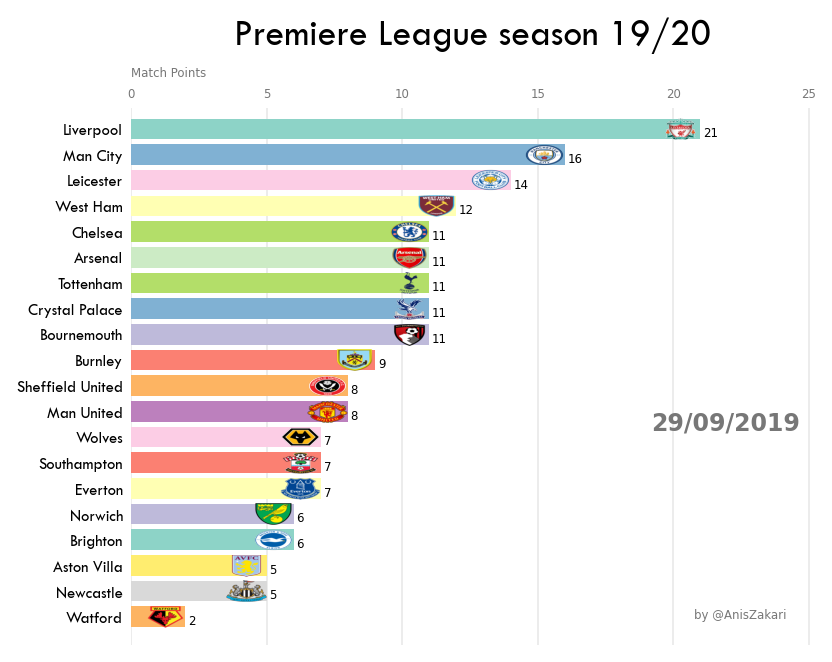

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=170, tight_layout=True)
date = dates[18]

#colors = plt.cm.Dark2(range(7))
colors = plt.cm.Set3(range(12))


s = points_table.loc[date]
y = points_table.loc[date].rank(method='first')
ax.barh(y=y.values, width=s.values, color=colors, tick_label=s.index)
ax.set_yticklabels(s.index, FontProperties = prop_light)
ax.text(0.98, 0.4, date, transform=ax.transAxes, color='#777777', size=10, ha='right', weight=800)

nice_axes(ax)


height = 0.7
labels = y.sort_values(ascending= True).index
values = s.sort_values(ascending= True).values


for i, (label, value) in enumerate(zip(labels, values)):
    path = f'logos/{label}.png'
    img = plt.imread(path)
    ax.imshow(img, extent=[value -1.5 , value, i + 1.6*height / 2, i + 4*height / 2], aspect='auto', zorder=2)
    ax.text(value + 0.1, i+0.7, int(value), size = 5, ha='left') 
# Add year right middle portion of canvas
ax.set_xlim(0, max(values) * 1.2)
ax.set_ylim(-0.1, len(labels) +0.8)
plt.tight_layout()
plt.show()

## Test Smooth transitions

In [ ]:
df_test = points_table.iloc[20:25].reset_index()
df_test.index = df_test.index * 3
df_test = df_test.reindex(range(df_test.index[-1]+1))

In [ ]:
df_test['date'] = df_test['date'].fillna(method = 'ffill')
df_test = df_test.set_index('date')
df_test_rank = df_test.rank(method = 'first', axis = 1)
df_test_rank = df_test_rank.interpolate()
df_test = df_test.interpolate()


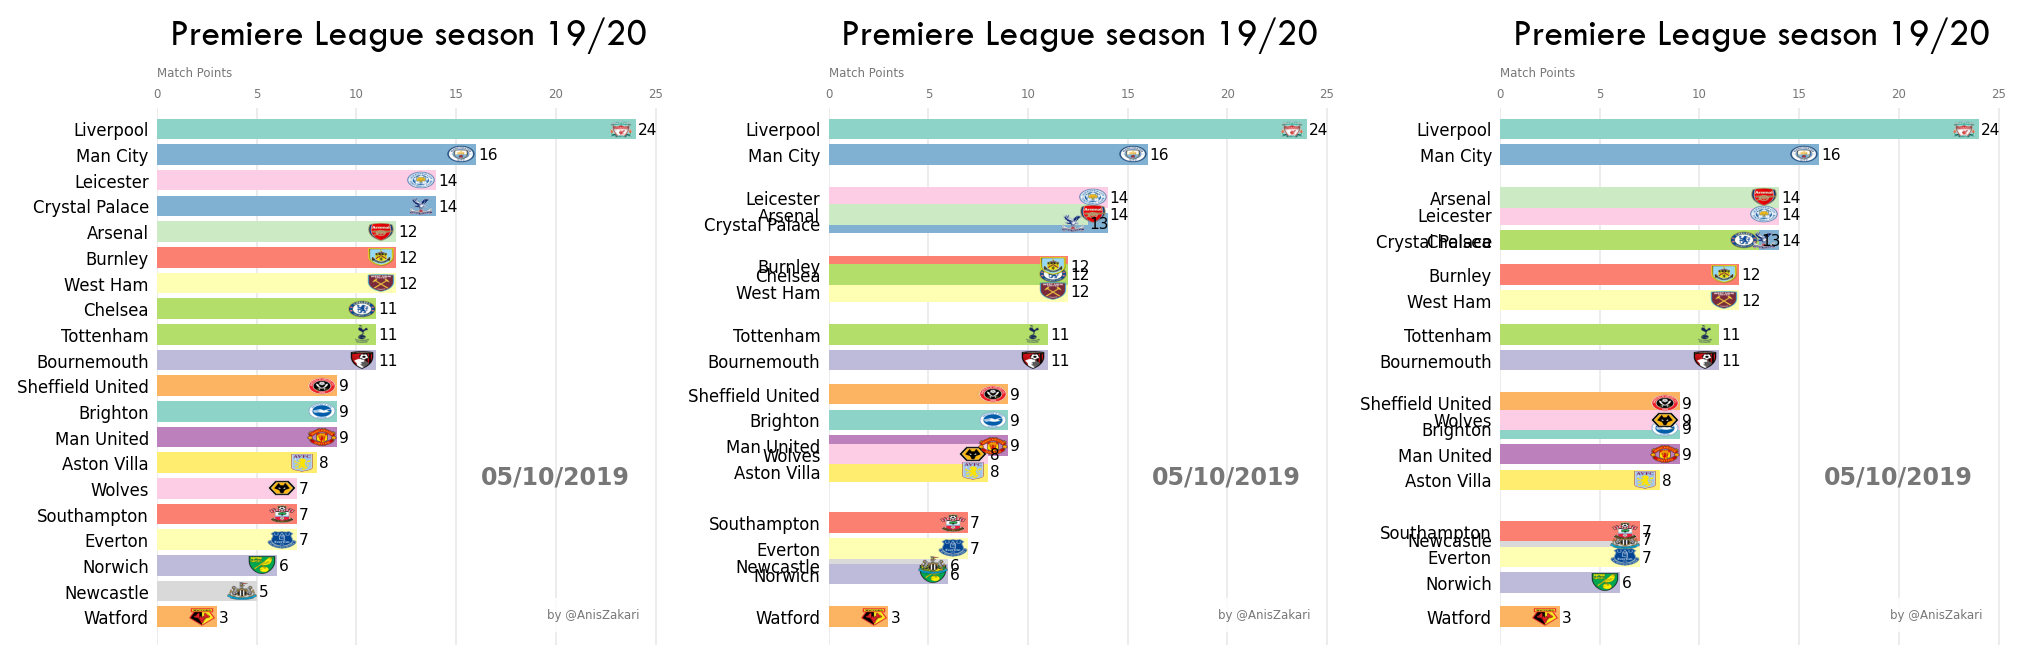

In [ ]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=170, tight_layout=True)
df_rank = df_test_rank.head(3)
df_score = df_test.head(3)
for i, ax in enumerate(ax_array):
    s = df_score.iloc[i]
    y = df_rank.iloc[i]
    ax.barh(y=y.values, width=s.values, color=colors, tick_label=s.index)
    ax.text(0.94, 0.3, df_rank.index[i], transform=ax.transAxes, color='#777777', size=10, ha='right', weight=800)
    nice_axes(ax)
    
    #add images
    height = 0.7
    teams = y.sort_values(ascending= True).index
    values = s.sort_values(ascending= True).values
    for  team, value in (zip(teams, values)):
        i = y[team]
        path = f'logos/{team}.png'
        img = plt.imread(path)
        ax.imshow(img, extent=[value -1.5 , value, i -height / 2, i + height / 2], zorder=2, aspect = 'auto')
        ax.text(value + 0.1, i-0.2, int(value), size = 6.5, ha='left') 
    ax.set_xlim(0, max(values) * 1.05)
    ax.set_ylim(-0.1, len(labels) +0.8)
    #ax.tight_layout()
    


## Prepare data function

In [ ]:
def prepare_data(df, steps=16):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(points_table)
df_expanded.head()

Liverpool  West Ham  Bournemouth  ...  Sheffield United  Chelsea  Wolves
date                                          ...                                   
09/08/2019        3.0       0.0       0.0000  ...            0.0000      0.0     0.0
09/08/2019        3.0       0.0       0.0625  ...            0.0625      0.0     0.0
09/08/2019        3.0       0.0       0.1250  ...            0.1250      0.0     0.0
09/08/2019        3.0       0.0       0.1875  ...            0.1875      0.0     0.0
09/08/2019        3.0       0.0       0.2500  ...            0.2500      0.0     0.0

[5 rows x 20 columns]

In [ ]:
#Creating a dict with team logos
dict_img = {}
for team in teams:
    path = f'logos/{team}.png'
    img = plt.imread(path)
    dict_img[team] = img

In [ ]:
html = anim.to_html5_video()
HTML(html)